# Fashion Mnist 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import random 
import xgboost
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Explore the data

In [2]:
test=pd.read_csv('fashion-mnist_test.csv')
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [3]:
train=pd.read_csv('fashion-mnist_train.csv')
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


Lets see how many missing values exists


In [4]:
print("Number of missing values in the test set:",test.isnull().any().sum())

Number of missing values in the test set: 0


In [5]:
print("Number of missing values in the train set:",train.isnull().any().sum())

Number of missing values in the train set: 0


The data is ready for work 

###### Lets show some information about the data
 

In [6]:
# Counter for each label
label_counter=train["label"].value_counts()

# Total number of labels
total_labels=len(train)

# Lets make dictionary for all the labels
labels={0:"T-shirt/top" , 1:"Trouser" , 2:"Pullover" , 3:"Dress" , 4:"Coat" , 
        5:"Sandal" , 6:"Shirt" , 7:"Sneaker" , 8:"Bag" , 9:"Ankle Boot"}

for i in range(len(label_counter)):
    label=labels[label_counter.index[i]]
    counter=label_counter.values[i]
    precent=(counter/total_labels)*100
    print("{:<15s}: has {} samples which is {}% of the data.".format(label, counter, precent))

T-shirt/top    : has 6000 samples which is 10.0% of the data.
Trouser        : has 6000 samples which is 10.0% of the data.
Pullover       : has 6000 samples which is 10.0% of the data.
Dress          : has 6000 samples which is 10.0% of the data.
Coat           : has 6000 samples which is 10.0% of the data.
Sandal         : has 6000 samples which is 10.0% of the data.
Shirt          : has 6000 samples which is 10.0% of the data.
Sneaker        : has 6000 samples which is 10.0% of the data.
Bag            : has 6000 samples which is 10.0% of the data.
Ankle Boot     : has 6000 samples which is 10.0% of the data.


In [7]:
test.shape

(10000, 785)

In [8]:
train.shape

(60000, 785)

In [9]:
train_arr = np.array(train,dtype='float32')
test_arr = np.array(test,dtype = 'float32')

Lets show some random image

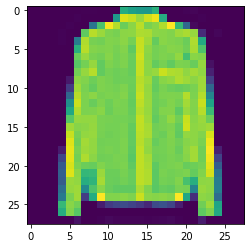

The image is: Shirt


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = random.randint(1,60000)
plt.figure()
plt.imshow(train_arr[i,1:].reshape(28,28))
plt.grid(False)
plt.show()
label = int(train_arr[i,0])
print(f'The image is: {class_names[label]}')

###### Lets show 3 samples from any label

In [11]:
images=[]

for k in labels.keys():
    # Get two samples for each category
    samples = train[train["label"] == k].head(3)
    # Append the samples to the samples list
    for j, s in enumerate(samples.values):
        # First column contain labels, hence index should start from 1
        img = np.array(samples.iloc[j, 1:]).reshape(28,28)
        images.append(img)
        
print("Total number of sample images to plot: ", len(images))

Total number of sample images to plot:  30


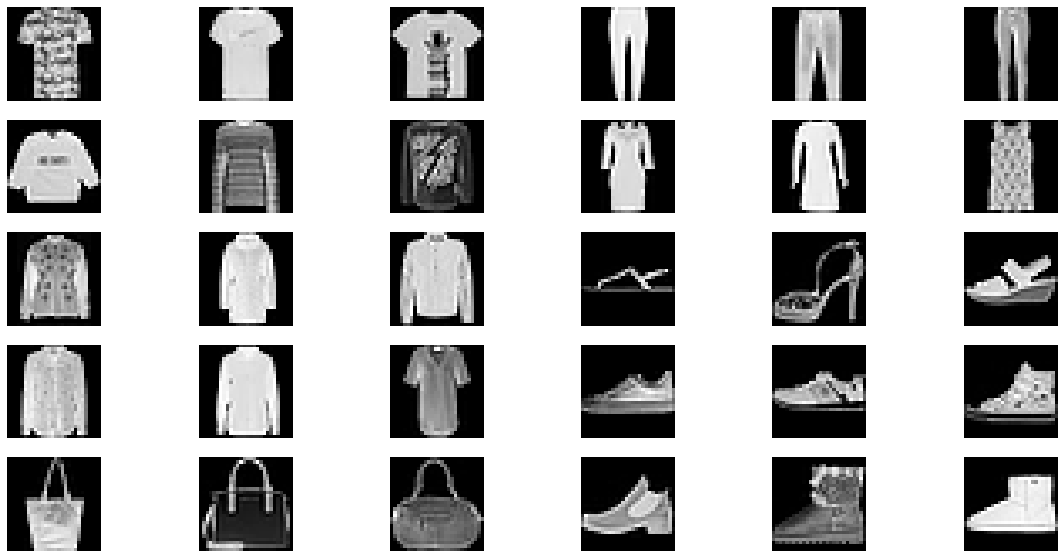

In [12]:
f, ax = plt.subplots(5,6, figsize=(20,10))

for i, img in enumerate(images):
    ax[i//6, i%6].imshow(img, cmap='gray')
    ax[i//6, i%6].axis('off')
plt.show()

## Preprocessing

After showing the data we will split the train set in order to test some models on it before
testing the real test set


In [13]:
train_labels = train["label"]
test_labels = test["label"]

# Drop the labels column from train dataframe as well as test dataframe
train = train.drop(["label"], axis =1)
test = test.drop(["label"], axis=1)

# Split the training dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train, train_labels, test_size=0.2, random_state=0)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the validation set: ", len(X_valid))

Number of samples in the train set:  48000
Number of samples in the validation set:  12000


Lets plot the new train set 

<AxesSubplot:xlabel='label', ylabel='count'>

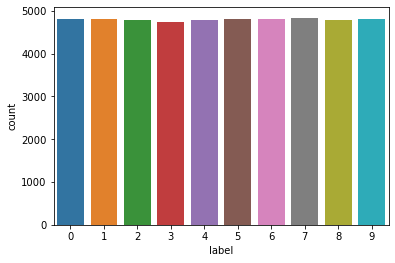

In [14]:
sns.countplot(y_train)

There are 784 columns and each image is 28*28 grayscale image, so we will need to reshape the data.

In [15]:
# Reshaping the data.
X_train = np.array(X_train.iloc[:, :]).reshape(len(X_train),28*28)
X_valid = np.array(X_valid.iloc[:, :]).reshape(len(X_valid), 28*28)
X_test = np.array(test.iloc[:,:]).reshape(len(test), 28*28)

In [16]:
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [17]:
# All the values are between 0-255 , so by dividing the values by 255 we will normalize the value to be between 0-1.
X_train /=255.
X_valid /=255.
X_test /=255.

## Models before the PCA

### KNN 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh_pred=neigh.predict(X_valid)

In [19]:
metrics.accuracy_score(y_valid,neigh_pred)

0.856

That's quite nice score for first attempt, let's try more models.

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_valid)

In [21]:
metrics.accuracy_score(y_valid,clf_pred)

0.8544166666666667

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_valid)

In [23]:
metrics.accuracy_score(y_valid,rf_pred)

0.8798333333333334

In [50]:
import xgboost
xgb=xgboost.XGBClassifier(n_estimators=150)
xgb.fit(X_train,y_train)
xgb_p=xgb.predict(X_valid)

[18:12:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
metrics.accuracy_score(y_valid,xgb_p)

0.90125

Let's take look at the results:
* We got score of 0.856 with knn.
* we got score of 0.854 with logistic regression.
* We got the best result with the random forest classifier that gave us score of 0.879.

In order to get better results we will do PCA

## Models with PCA

PCA is actually a very important tool for dimensionality reduction of large data sets.
Reducing the number of components or features may cost the accuracy,but it makes the large data set simpler, easy to explore and visualize. Also, it reduces the complexity of the model which makes the algorithms run faster.

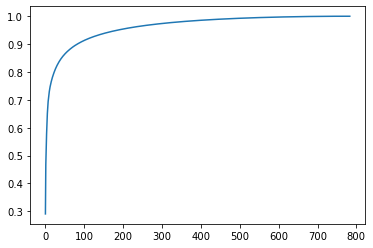

In [26]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)
sum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(sum)

In [34]:
pca=PCA(n_components=0.9505)
X_trainreduce=pca.fit_transform(X_train)
X_validreduce=pca.transform(X_valid)

In [35]:
pca.n_components_

188

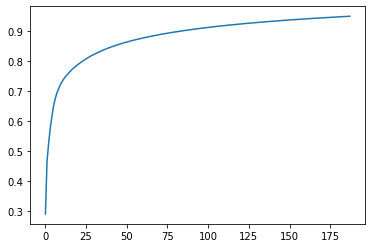

In [36]:
sum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(sum)

In [37]:
X_train_pca=pd.DataFrame(X_trainreduce)
X_valid_pca=pd.DataFrame(X_validreduce)

### KNN after PCA

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neighpca = KNeighborsClassifier(n_neighbors=5)
neighpca.fit(X_train_pca, y_train)
neighpca_pred=neighpca.predict(X_valid_pca)

In [45]:
metrics.accuracy_score(y_valid,neighpca_pred)

0.8634166666666667

### Logistic Regression after PCA 

In [46]:
from sklearn.linear_model import LogisticRegression
clfpca = LogisticRegression(random_state=0)
clfpca.fit(X_train_pca,y_train)
clfpca_pred=clfpca.predict(X_valid_pca)

In [47]:
metrics.accuracy_score(y_valid,clfpca_pred)

0.8528333333333333

### Random Forest classifier after PCA

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_pca, y_train)
rf_pred=rf.predict(X_valid_pca)

In [41]:
metrics.accuracy_score(y_valid,rf_pred)

0.8619166666666667

### XGBOOST after PCA

In [48]:
import xgboost
xgb_clf=xgboost.XGBClassifier(n_estimators=150, eval_metric='mlogloss')
xgb_clf.fit(X_train_pca,y_train)
xgb_pred=xgb_clf.predict(X_valid_pca)

In [49]:
metrics.accuracy_score(y_valid,xgb_pred)

0.8896666666666667

* We can see clearly that the better results were before we did PCA.
* The only model that gave us better score after the PCA was KNN that gave 0.86, and before the PCA gave 0.856.
* Before the PCA i got 0.854 with Logistic regression, and after the PCA i got 0.852.
* Before the PCA i got 0.9 with xgboost, and after the PCA i got 0.88.
* Before the PCA i got 0.879 with RFC, and after the PCA i got 0.86.


## Cheking the test set on the best model

After a lot of tests on the train valid i want to test the X_test that as been untouched until now.  
I did not touch the test in order to not change the score along the training.

In [52]:
xgb_f=xgb.predict(X_test)
metrics.accuracy_score(test_labels,xgb_f)

0.9089

Now i will check the test set on the xgboost after the pca.

In [56]:
X_testreduce=pca.transform(X_test)

In [63]:
X_testreduce_pca=pd.DataFrame(X_testreduce)

In [64]:
xgb_c=xgb_clf.predict(X_testreduce_pca)
metrics.accuracy_score(test_labels,xgb_c)

0.8856

<B> In conclusion we got the best score with the test set.  
    Before the test set the best score was 0.90125 , and with the best model on the test set we got 0.9089.  
    With the xgboost after the dimensionality reduction we got score of 0.8856.